# Multipartite Entanglement: Motivation, Definitions, and Key States

Quantum entanglement is a core resource in quantum information and many-body physics. For systems with more than two qubits, the structure of entanglement becomes much richer and more complex, directly impacting quantum computation, communication, networks, and novel phases of matter (e.g., topological order).

**Why study multipartite entanglement?**
- To classify different types of entanglement (global, distributed, symmetric, etc.)
- To design and verify quantum tasks and protocols (computation, communication, QCVV)
- To understand the robustness and fragility of entanglement under noise and loss

## Key Multipartite States
- **GHZ State**: $|\mathrm{GHZ}_N\rangle = \frac{1}{\sqrt{2}}(|00\cdots0\rangle + |11\cdots1\rangle)$
  - Represents global, all-or-nothing entanglement. If any qubit is lost, the rest become separable.
- **W State**: $|\mathrm{W}_N\rangle = \frac{1}{\sqrt{N}}(|10\cdots0\rangle + |010\cdots0\rangle + \cdots + |0\cdots01\rangle)$
  - Distributed entanglement, robust to loss: removing one qubit leaves the rest still entangled.
- **Dicke State**: $|D^N_k\rangle = \frac{1}{\sqrt{\binom{N}{k}}}\sum_{\text{weight}=k}|\text{permutations of k ones and N-k zeros}\rangle$
  - Symmetric superposition of k excitations among N qubits; combines features of global and distributed entanglement.
- **Cluster/Graph State**: $|\mathrm{Cluster}_N\rangle = \prod_{i=1}^{N-1} \mathrm{CZ}_{i,i+1} |+\rangle^{\otimes N}$
  - Resource for measurement-based quantum computation (MBQC); entanglement structure defined by a graph.

## Entanglement Measures
- **Schmidt spectrum** and **entropy** are fingerprints of multipartite entanglement:
  - Schmidt spectrum: reveals the type and complexity of entanglement (rank, distribution)
  - Entropy: quantifies the strength of entanglement, useful for verification and classification

In this notebook, we will generate, analyze, and visualize these states, and study their entanglement properties using code and mathematical tools.

## State Generation and Entanglement Analysis Tools

To study multipartite entanglement, we need to generate various quantum states (GHZ, W, Dicke, Cluster, Graph states) and analyze their entanglement properties. The following code cells provide utility functions for:
- Generating standard multipartite entangled states
- Calculating density matrices, reduced density matrices, and entropies
- Performing Schmidt decomposition and extracting the Schmidt spectrum
- Visualizing entanglement properties

These tools will be used throughout the notebook to analyze and compare the entanglement structure of different quantum states.

# Motivation for Multipartite Entanglement (Physics/Mathematics)

Quantum entanglement is a core resource in quantum information and quantum many-body physics. For many-body systems (multiple qubits), the structure of entanglement is much more complex than in the two-body case, directly impacting quantum computation, quantum communication, quantum networks, and novel phases of matter (such as topological order).

Studying typical multipartite entangled states like GHZ, W, and Dicke states helps us:
- **Classify multipartite entanglement:** Different states represent different entanglement structures and physical phenomena.
- **Design quantum tasks:** Such as quantum computation, distributed communication, and entanglement verification.
- **Understand fragility and robustness of entanglement:** Different states respond differently to noise and loss, affecting experiments and applications.

---

## GHZ 

$|{\rm GHZ}_N\rangle = \frac{1}{\sqrt{2}}\left(|00\cdots0\rangle + |11\cdots1\rangle\right)$

The GHZ state (Greenberger–Horne–Zeilinger) is the simplest example of "global entanglement." It plays a key role in quantum nonlocality, quantum computation, and quantum secure communication.

**Physical meaning:** The GHZ state is entangled only when all particles are present; if any one particle is lost, the rest become completely separable. This "all-or-nothing" entanglement is the best example for testing quantum mechanics against local realism (e.g., Mermin inequality).


---

## W State

$|{\rm W}_N\rangle = \frac{1}{\sqrt{N}}\left(|10\cdots0\rangle + |010\cdots0\rangle + \cdots + |0\cdots01\rangle\right)$

The W state represents "distributed" multipartite entanglement. It is important in quantum networks, distributed quantum computation, and quantum sensing.

**Physical meaning:** Even if one particle is lost, the remaining particles are still entangled, showing high robustness and distributed entanglement. This makes the W state especially suitable for practical quantum networks with loss.

---

## Dicke State

$|D^{N}_{k}\rangle = \frac{1}{\sqrt{\binom{N}{k}}}\sum_{\text{weight}=k}|\text{permutations of k ones and N{-}k zeros}\rangle$

The Dicke state is a representative of symmetric multipartite entanglement, widely appearing in quantum optics, collective spin systems, and quantum sensing.

**Physical meaning:** The Dicke state describes the situation where "k excitations are symmetrically distributed among N particles," combining features of both global and distributed entanglement. It is an important resource for studying collective phenomena (such as superradiance) and symmetric multipartite entanglement verification (such as spin squeezing).

---

## Cluster state / Graph state

$|{\rm Cluster}_N\rangle = \prod_{i=1}^{N-1} \mathrm{CZ}_{i,i+1} |+\rangle^{\otimes N}$

, where $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$，$\mathrm{CZ}$ 為 controlled-Z gate。

$|{\rm StarGraph}_N\rangle = \prod_{i=2}^{N} \mathrm{CZ}_{1,i} |+\rangle^{\otimes N}$

That is, the first qubit is the center, connected to all other qubits via CZ gates.

**Cluster state** is the basic resource state for measurement-based quantum computation (MBQC), with a special multipartite entanglement structure.

**Graph state** is a class of multipartite entangled states defined by a graph (vertices/qubits, edges/entangling gates), with the cluster state as a special case.

**Physical meaning:** Graph/Cluster states enable measurement-only quantum computation, quantum error correction, and quantum network protocols.

**Entanglement properties:** The Schmidt spectrum depends on the graph structure and usually shows strong multipartite entanglement. Cluster states are robust to local noise, making them suitable for experimental realization and verification.

**QCVV applications:** Commonly used for verifying multipartite entanglement witnesses, quantum network entanglement distribution, and quantum computation resource verification.

---

## Why study the Schmidt spectrum and entropy?

The Schmidt spectrum and entropy are the "fingerprints" of multipartite entanglement.
- **Schmidt spectrum:** Reflects the type and complexity of entanglement (rank, distribution).
- **Entropy:** Quantifies the strength of entanglement and can be used for verification and classification.

These tools allow us to systematically compare, verify, and design multipartite entangled states, linking to various applications in quantum information and many-body physics.

In [1]:
import sys
sys.path.append('../src')
import sympy as sp
import cvxpy as cp
from state_utils import *
from entanglement_analysis import *

In [2]:
# 範例用法
N = 4
ghz = ghz_state(N)
print("GHZ state SDP witness violation:")
sdp_witness_all_bipartitions(ghz, N)

w = w_state(N)
print("\nW state SDP witness violation:")
sdp_witness_all_bipartitions(w, N)

dicke = dicke_state(N, 2)
print("\nDicke state SDP witness violation:")
sdp_witness_all_bipartitions(dicke, N)

GHZ state SDP witness violation:
Partition 1|3, rho shape: (16, 16), dims: [2, 8]
SDP status: optimal
W.value is None? False
Partition 1|3: SDP witness value = (6.07316997119911e-06+0j)
Partition 2|2, rho shape: (16, 16), dims: [4, 4]
SDP status: optimal
W.value is None? False
Partition 2|2: SDP witness value = (6.07316997119911e-06+0j)

W state SDP witness violation:
Partition 1|3, rho shape: (16, 16), dims: [2, 8]
SDP status: optimal
W.value is None? False
Partition 1|3: SDP witness value = (1.1832016616197816e-06+0j)
Partition 2|2, rho shape: (16, 16), dims: [4, 4]
SDP status: optimal
W.value is None? False
Partition 2|2: SDP witness value = (1.1832016616197816e-06+0j)

Dicke state SDP witness violation:
Partition 1|3, rho shape: (16, 16), dims: [2, 8]
SDP status: optimal
W.value is None? False
Partition 1|3: SDP witness value = (1.1832124598716142e-06+0j)
Partition 2|2, rho shape: (16, 16), dims: [4, 4]
SDP status: optimal
W.value is None? False
Partition 2|2: SDP witness value = (

/usr/local/Caskroom/miniconda/base/envs/qiskit-env/lib/python3.10/site-packages/scs/__init__.py:83: UserWarning: Converting A to a CSC (compressed sparse column) matrix; may take a while.
  warn(


[(1, 3, (1.1832124598716142e-06+0j)), (2, 2, (1.1832124598716142e-06+0j))]

In [4]:
import cvxpy as cp
import numpy as np

A = np.array([[1, 2], [2, 8]], dtype=np.complex128)
X = cp.Variable((2, 2), hermitian=True)
constraints = [cp.trace(X) == 1, X >> 0]  # 加上正半定
prob = cp.Problem(cp.Minimize(cp.real(cp.trace(X @ A))), constraints)
prob.solve(solver=cp.SCS)
print("SDP status:", prob.status)
print("X.value:", X.value)

SDP status: optimal
X.value: [[ 0.93412157+0.j -0.24806947+0.j]
 [-0.24806947+0.j  0.06587843+0.j]]


/usr/local/Caskroom/miniconda/base/envs/qiskit-env/lib/python3.10/site-packages/scs/__init__.py:83: UserWarning: Converting A to a CSC (compressed sparse column) matrix; may take a while.
  warn(


In [ ]:
#  計算函數區
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import networkx as nx

def density_matrix(state):
    """Return the density matrix of a pure state."""
    return np.outer(state, np.conj(state))

def von_neumann_entropy(rho):
    """Compute the von Neumann entropy of a density matrix."""
    eigvals = np.linalg.eigvalsh(rho)
    eigvals = eigvals[eigvals > 1e-12]  # avoid log(0)
    return -np.sum(eigvals * np.log2(eigvals))

def renyi_entropy(rho, alpha=2):
    """Compute the Renyi entropy of order alpha."""
    eigvals = np.linalg.eigvalsh(rho)
    eigvals = eigvals[eigvals > 1e-12]
    return 1/(1-alpha) * np.log2(np.sum(eigvals**alpha))

def partial_trace(rho, keep, dims):
    """
    Partial trace over subsystems not in 'keep'.
    rho: density matrix (2^N x 2^N)
    keep: list of subsystem indices to keep (e.g., [0] for first qubit)
    dims: list of dimensions for each subsystem (e.g., [2,2,2] for 3 qubits)
    """
    N = len(dims)
    traced = list(set(range(N)) - set(keep))
    # Reshape to 2N indices
    reshaped = rho.reshape([2]*N*2)
    # Move kept indices to front
    perm = keep + [i for i in range(N) if i not in keep]
    perm2 = [i+N for i in perm]
    perm_full = perm + perm2
    reshaped = np.transpose(reshaped, perm_full)
    d_keep = np.prod([dims[i] for i in keep])
    d_trace = np.prod([dims[i] for i in traced])
    # Trace out last d_trace indices
    return np.trace(reshaped.reshape(d_keep, d_trace, d_keep, d_trace), axis1=1, axis2=3)

# Schmidt decomposition for bipartition: first k qubits vs rest
def schmidt_spectrum(state, N, k):
    psi = state.reshape([2]*N)
    psi = psi.reshape(2**k, 2**(N-k))
    u, s, vh = np.linalg.svd(psi, full_matrices=False)
    return s


# 分析函數區
def analyze_entanglement(state_fn, state_name, N_list, k_list):
    for N in N_list:
        state = state_fn(N)
        print(f"\n=== {state_name} state, N={N} ===")
        for k in k_list:
            # Bipartition: 前 k 個 vs 後 N-k 個
            psi = state.reshape([2]*N)
            psi = psi.reshape(2**k, 2**(N-k))
            u, s, vh = np.linalg.svd(psi, full_matrices=False)
            # Reduced density matrix for subsystem A (前 k 個)
            rho_A = np.dot(u, np.diag(s) @ u.conj().T)
            entropy = von_neumann_entropy(rho_A)
            print(f"Partition {k}|{N-k}: Entropy = {entropy:.4f}, Schmidt spectrum = {np.round(s,4)}")


# 視覺化函數區
def plot_entanglement(state_fn, state_name, N_list, k_list, color='C0'):
    for N in N_list:
        state = state_fn(N)
        fig, axes = plt.subplots(1, len(k_list), figsize=(5*len(k_list), 4))
        if len(k_list) == 1:
            axes = [axes]
        for idx, k in enumerate(k_list):
            psi = state.reshape([2]*N).reshape(2**k, 2**(N-k))
            u, s, vh = np.linalg.svd(psi, full_matrices=False)
            entropy = -np.sum(s**2 * np.log2(s**2 + 1e-12))
            bars = axes[idx].bar(range(len(s)), s, color=color, alpha=0.7)
            # 在每個柱子上標註數值
            for bar, val in zip(bars, s):
                axes[idx].text(bar.get_x() + bar.get_width()/2, val + 0.02, f"{val:.2f}", ha='center', va='bottom', fontsize=10)
            axes[idx].set_title(f"{state_name} N={N}  Partition {k}|{N-k}\nEntropy={entropy:.3f}")
            axes[idx].set_xlabel("Schmidt index")
            axes[idx].set_ylabel("Schmidt coefficient")
            axes[idx].set_ylim(0, 1.05)
        plt.tight_layout()
        plt.show()

In [22]:
# 量子態函數區

# Single qubit state
psi = np.array([1, 1j]) / np.sqrt(2)
rho = density_matrix(psi)

# Bell state
bell = np.array([1, 0, 0, 1]) / np.sqrt(2)
rho_bell = density_matrix(bell).reshape(2,2,2,2)
# Partial trace over qubit 1
rho_A = np.trace(rho_bell, axis1=1, axis2=3)

# GHZ state
def ghz_state(N):
    state = np.zeros(2**N, dtype=complex)
    state[0] = 1/np.sqrt(2)
    state[-1] = 1/np.sqrt(2)
    return state

# Example: GHZ state N=3
N = 3
ghz = ghz_state(N)
rho_ghz = np.outer(ghz, ghz.conj())
# Reduced density matrix for qubit 0
rho_A = partial_trace(rho_ghz, [0], [2]*N)


# Dicke state
def dicke_state(N, k):
    state = np.zeros(2**N, dtype=complex)
    for pos in combinations(range(N), k):
        idx = sum([2**p for p in pos])
        state[idx] = 1
    return state / np.sqrt(np.math.comb(N, k))


# Cluster state
def cluster_state(N):
    """1D cluster state on N qubits."""
    state = np.ones(2**N, dtype=complex) / np.sqrt(2**N)
    for i in range(N-1):
        for j in range(2**N):
            # If both qubit i and i+1 are 1, add a -1 phase (CZ gate)
            if ((j >> i) & 1) and ((j >> (i+1)) & 1):
                state[j] *= -1
    return state

# Graph state (define from adjacency matrix)
def graph_state(adj_matrix):
    """General graph state from adjacency matrix."""
    N = adj_matrix.shape[0]
    state = np.ones(2**N, dtype=complex) / np.sqrt(2**N)
    for i in range(N):
        for j in range(i+1, N):
            if adj_matrix[i, j]:
                for k in range(2**N):
                    if ((k >> i) & 1) and ((k >> j) & 1):
                        state[k] *= -1
    return state


In [20]:
# Example: 1D cluster state N=4
N = 4
cluster = cluster_state(N)

# Example: Star graph state N=4
adj = np.zeros((N, N), dtype=int)
adj[0, 1:] = 1
adj[1:, 0] = 1
star_graph = graph_state(adj)

# GHZ/W State

In [4]:
# Analyze entanglement entropy for all single-qubit subsystems in GHZ and W states

def w_state(N):
    state = np.zeros(2**N, dtype=complex)
    for i in range(N):
        state[2**i] = 1
    return state / np.sqrt(N)

N = 4  # You can try N=3,4,5
ghz = ghz_state(N)
w = w_state(N)

rho_ghz = np.outer(ghz, ghz.conj())
rho_w = np.outer(w, w.conj())

print("Single-qubit entanglement entropy for GHZ and W states:")
for i in range(N):
    rhoA_ghz = partial_trace(rho_ghz, [i], [2]*N)
    rhoA_w = partial_trace(rho_w, [i], [2]*N)
    print(f"Qubit {i}: GHZ entropy = {von_neumann_entropy(rhoA_ghz):.4f}, W entropy = {von_neumann_entropy(rhoA_w):.4f}")

Single-qubit entanglement entropy for GHZ and W states:
Qubit 0: GHZ entropy = 1.0000, W entropy = 0.8113
Qubit 1: GHZ entropy = 1.0000, W entropy = 0.8113
Qubit 2: GHZ entropy = 1.0000, W entropy = 0.8113
Qubit 3: GHZ entropy = 1.0000, W entropy = 0.8113


## Schmidt Spectrum and Entropy: Fingerprints of Entanglement

The Schmidt spectrum and entropy are essential tools for characterizing multipartite entanglement:
- **Schmidt spectrum**: The set of singular values (Schmidt coefficients) from the Schmidt decomposition of a quantum state with respect to a bipartition. Multiple nonzero values indicate entanglement; the more uniform the spectrum, the stronger the entanglement.
- **Entropy**: Quantifies the strength of entanglement for a given partition. The von Neumann entropy and Rényi entropy are commonly used.

These quantities allow us to:
- Distinguish between product states and entangled states
- Compare the type and complexity of entanglement in different states (GHZ, W, Dicke, Cluster, etc.)
- Design and verify entanglement witnesses and robustness indicators for QCVV

The following code cells compute and visualize the Schmidt spectrum and entropy for various multipartite states and partitions.

In [ ]:
# Schmidt spectrum for N=4, k=2 (GHZ, W, Dicke) 
k = 2  # bipartition: first 2 qubits vs last 2 qubits
N = 4
ghz = ghz_state(N)
w = w_state(N)
dicke = dicke_state(N, 2)
print("Schmidt spectrum for GHZ state:", schmidt_spectrum(ghz, N, k))
print("Schmidt spectrum for W state:", schmidt_spectrum(w, N, k))
print("Schmidt spectrum for Dicke (k=2) state:", schmidt_spectrum(dicke, N, k))

Schmidt spectrum for GHZ state: [0.70710678 0.70710678 0.         0.        ]
Schmidt spectrum for W state: [7.07106781e-01 7.07106781e-01 3.92523115e-17 0.00000000e+00]
Schmidt spectrum for Dicke (k=2) state: [0.81649658 0.40824829 0.40824829 0.        ]


/var/folders/c3/sld2jf_555vgb5t01vk42w8h0000gn/T/ipykernel_29340/3815672350.py:38: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return state / np.sqrt(np.math.comb(N, k))



=== GHZ state, N=3 ===
Partition 1|2: Entropy = 0.7071, Schmidt spectrum = [0.7071 0.7071]
Partition 2|1: Entropy = 0.7071, Schmidt spectrum = [0.7071 0.7071]

=== GHZ state, N=4 ===
Partition 1|3: Entropy = 0.7071, Schmidt spectrum = [0.7071 0.7071]
Partition 2|2: Entropy = 0.7071, Schmidt spectrum = [0.7071 0.7071 0.     0.    ]

=== GHZ state, N=5 ===
Partition 1|4: Entropy = 0.7071, Schmidt spectrum = [0.7071 0.7071]
Partition 2|3: Entropy = 0.7071, Schmidt spectrum = [0.7071 0.7071 0.     0.    ]

=== W state, N=3 ===
Partition 1|2: Entropy = 0.6963, Schmidt spectrum = [0.8165 0.5774]
Partition 2|1: Entropy = 0.6963, Schmidt spectrum = [0.8165 0.5774]

=== W state, N=4 ===
Partition 1|3: Entropy = 0.6797, Schmidt spectrum = [0.866 0.5  ]
Partition 2|2: Entropy = 0.7071, Schmidt spectrum = [0.7071 0.7071 0.     0.    ]

=== W state, N=5 ===
Partition 1|4: Entropy = 0.6632, Schmidt spectrum = [0.8944 0.4472]
Partition 2|3: Entropy = 0.7035, Schmidt spectrum = [0.7746 0.6325 0.     

/var/folders/c3/sld2jf_555vgb5t01vk42w8h0000gn/T/ipykernel_29340/3425663706.py:34: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return state / np.sqrt(np.math.comb(N, k))


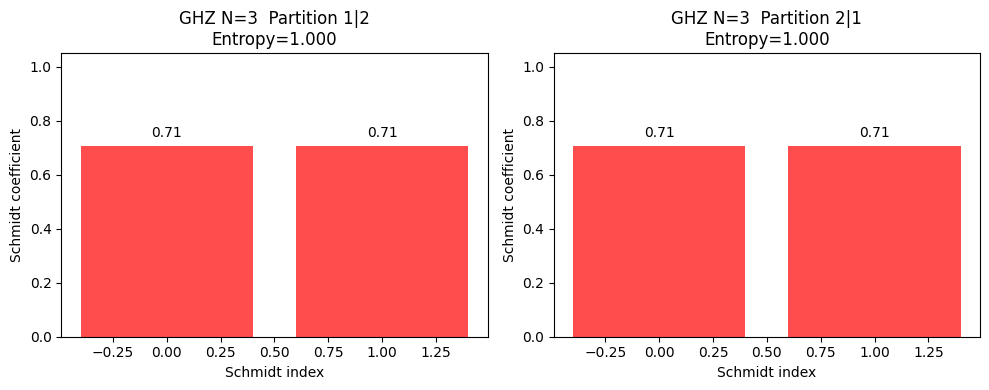

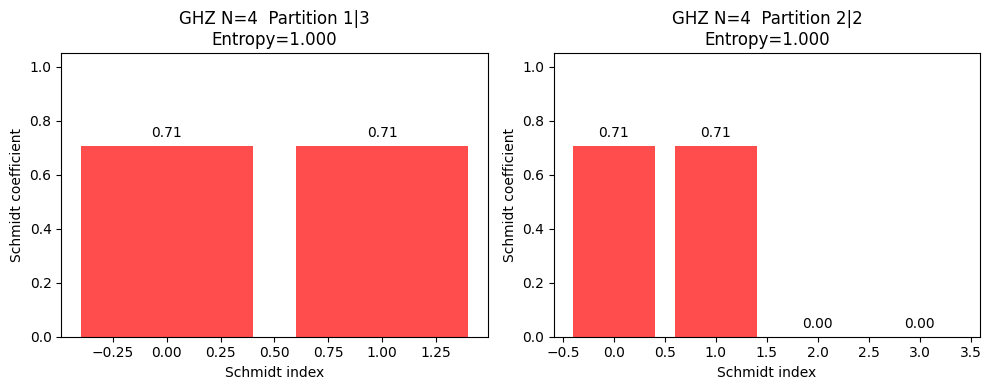

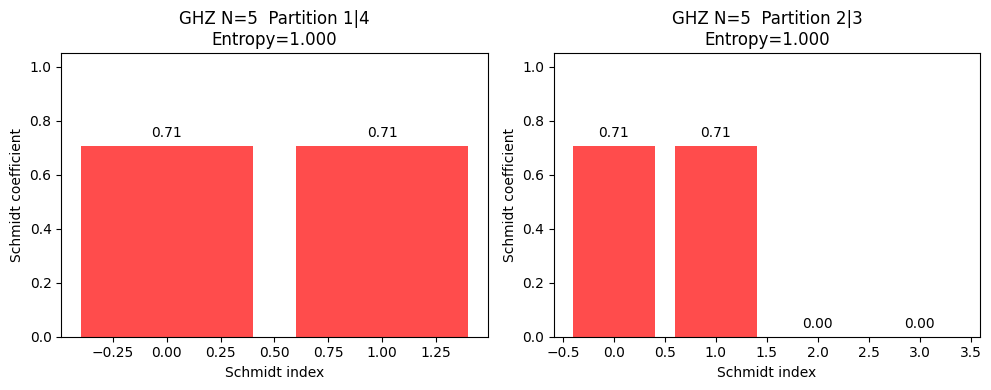

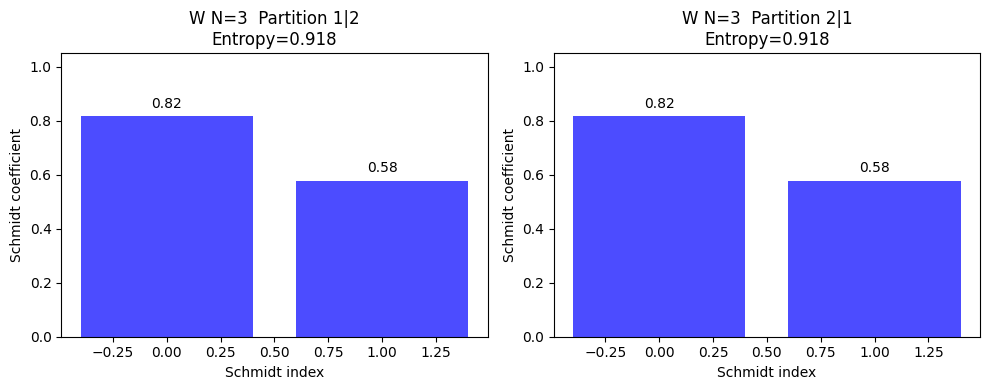

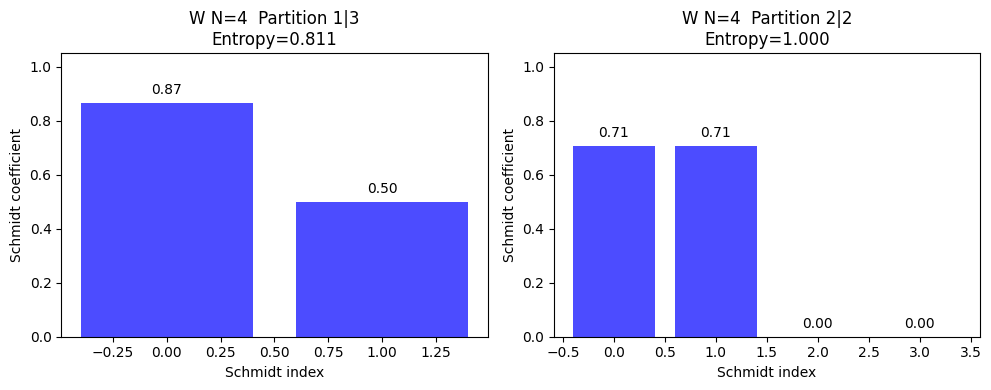

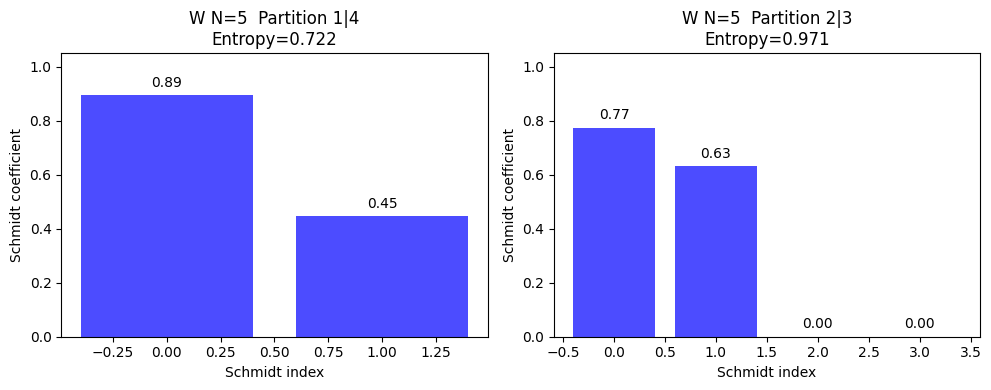

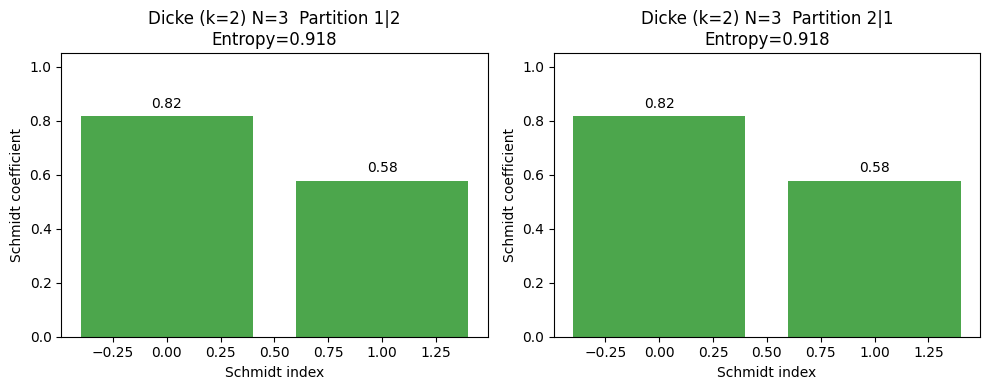

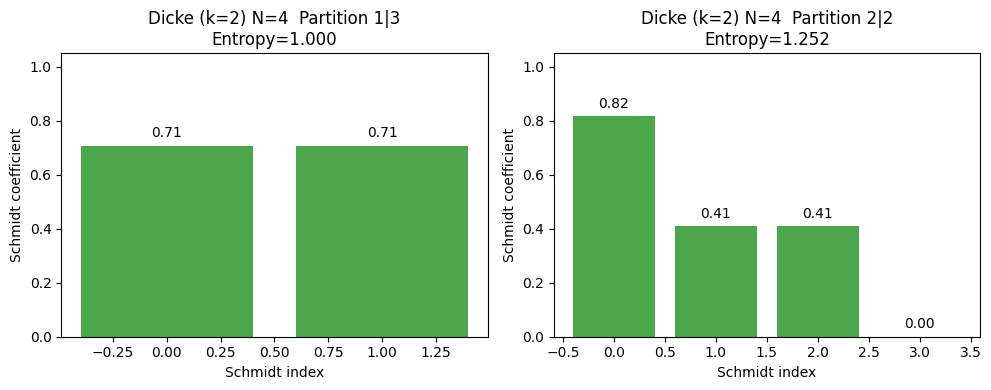

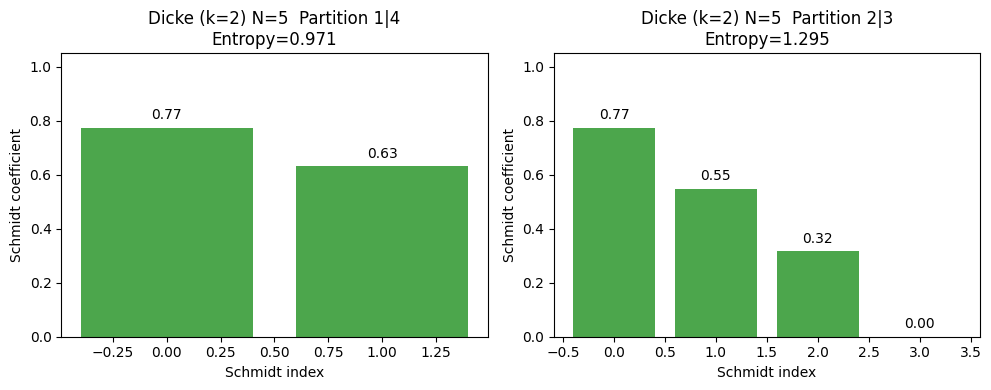

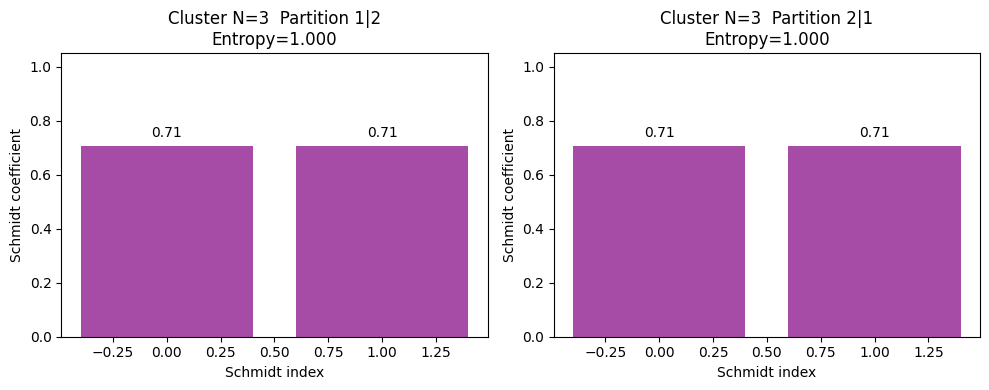

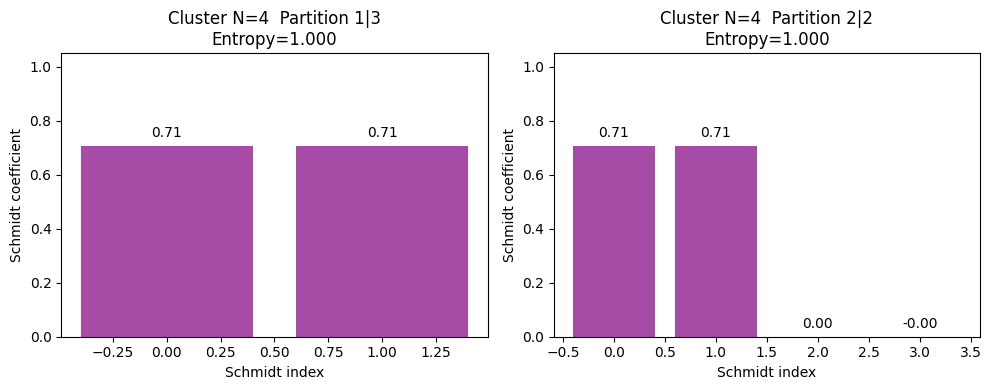

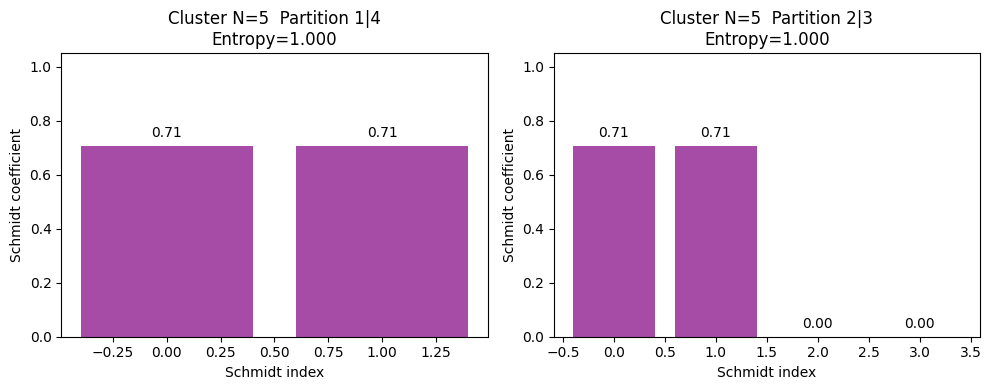

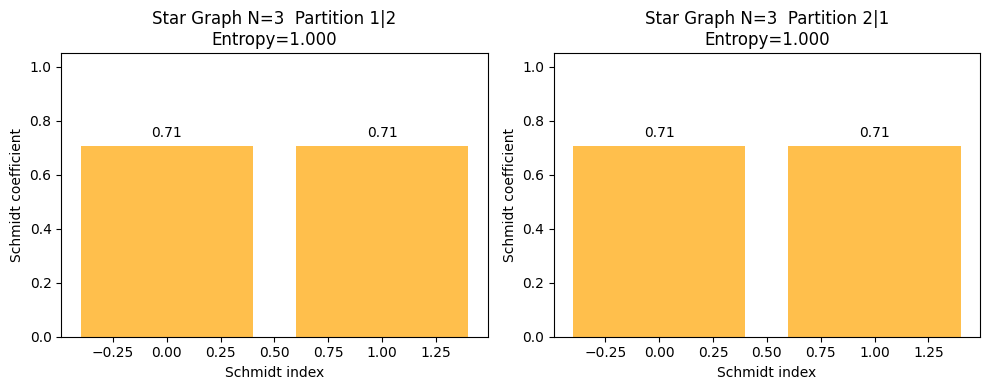

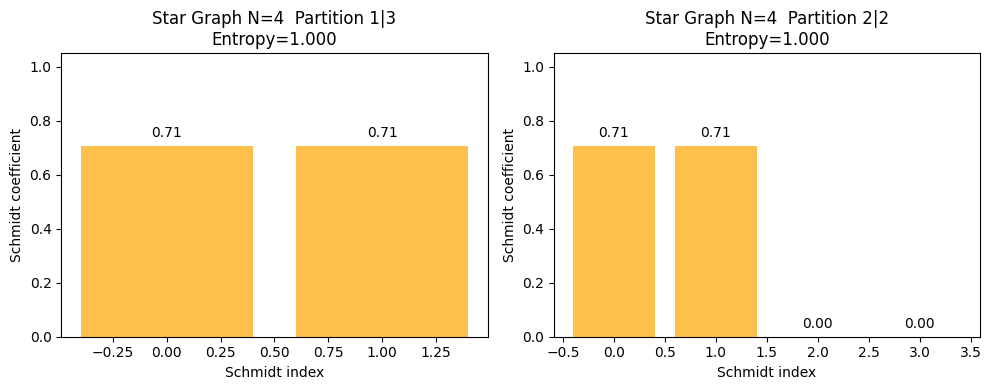

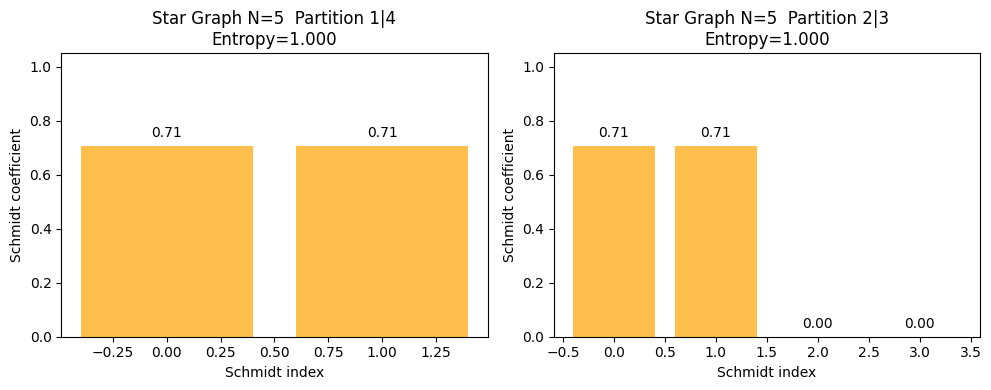

In [ ]:
# Calculate GHZ/W/Dicke/Cluster/StarGraph States' Schmidt spectrum and entropy at different partitions
# GHZ
analyze_entanglement(ghz_state, "GHZ", N_list=[3,4,5], k_list=[1,2])
# W
analyze_entanglement(w_state, "W", N_list=[3,4,5], k_list=[1,2])
# Dicke (k=2)
def dicke_state_k2(N):
    return dicke_state(N, 2)
analyze_entanglement(dicke_state_k2, "Dicke (k=2)", N_list=[3,4,5], k_list=[1,2])
# Cluster state
analyze_entanglement(cluster_state, "Cluster", N_list=[3,4,5], k_list=[1,2])
# Graph state (take star graph as an example)
def star_graph_state(N):
    adj = np.zeros((N, N), dtype=int)
    adj[0, 1:] = 1
    adj[1:, 0] = 1
    return graph_state(adj)
analyze_entanglement(star_graph_state, "Star Graph", N_list=[3,4,5], k_list=[1,2])




# Plot GHZ/W/Dicke/Cluster/StarGraph states' Schmidt spectrum for N=3,4,5 at different partitions  
plot_entanglement(ghz_state, "GHZ", N_list=[3,4,5], k_list=[1,2], color='red')
plot_entanglement(w_state, "W", N_list=[3,4,5], k_list=[1,2], color='blue')
plot_entanglement(dicke_state_k2, "Dicke (k=2)", N_list=[3,4,5], k_list=[1,2], color='green')
plot_entanglement(cluster_state, "Cluster", N_list=[3,4,5], k_list=[1,2], color='purple')
plot_entanglement(star_graph_state, "Star Graph", N_list=[3,4,5], k_list=[1,2], color='orange')

## Entanglement Properties and Applications of GHZ, W, and Dicke States

### GHZ State
- Maximal global entanglement: any bipartition shows maximal entanglement, but removing one qubit leaves the rest separable.
- Fragile to loss, but useful for global quantum information distribution and testing nonlocality (e.g., Mermin inequality).
- Schmidt spectrum: always two equal nonzero values for any contiguous bipartition, regardless of N or partition. This is a fingerprint of GHZ states.

### W State
- Distributed entanglement: loss of one qubit still leaves the rest entangled (robustness).
- Suitable for distributed quantum network tasks and multipartite entanglement verification (e.g., generalized concurrence/tangle).
- Schmidt spectrum: for contiguous bipartitions, typically two nonzero values (with unequal heights); only for non-contiguous bipartitions does the spectrum have more nonzero values. The single-qubit entropy is always less than 1.

### Dicke State (e.g., k=2)
- Symmetric superposition of k excitations among N qubits; combines features of global and distributed entanglement.
- Robust to loss (stronger than GHZ, weaker than W), suitable for describing partially global multipartite entanglement.
- Schmidt spectrum: usually has more than two nonzero values, and the distribution is uneven. The spectrum varies with N and partition, and this unevenness is a fingerprint of partially symmetric multipartite entanglement.

### Schmidt Spectrum and Product States
- If the Schmidt spectrum has only one nonzero value, the state is a product state; multiple nonzero values indicate entanglement, and the more uniform the spectrum, the stronger the entanglement.
- The number of nonzero Schmidt values (Schmidt rank) reflects the complexity of entanglement: GHZ/W = 2, Dicke is usually greater than 2.

### Relevance for QCVV and Quantum Networks
- Entropy and Schmidt spectrum can be used to design entanglement witnesses and robustness indicators for QCVV.
- GHZ: global synchronization; W: distributed networks; Dicke: symmetric multipartite verification (e.g., spin squeezing).
- These analyses form the basis for multipartite entanglement classification, measurement, and verification.

## Below are miscellaneous practice sections
- Construct Hamiltonian of Heisenberg model、Ising model、
- Numeric simulation: different boundary conditions、topological degenaracy of transverse field ising model

Practice the calculation of reduced density matrix and entanglement entropy

In [272]:
# Reshape the density matrix to a 2x2x2x2 tensor (2 qubits)
rho_bell_1 = rho_bell_1.reshape((2, 2, 2, 2))
rho_bell_2 = rho_bell_2.reshape((2, 2, 2, 2))
rho_bell_3 = rho_bell_3.reshape((2, 2, 2, 2))
rho_bell_4 = rho_bell_4.reshape((2, 2, 2, 2))

# Reduced density matrices for the first qubit of Bell states
rho_1 = np.trace(rho_bell_1, axis1=1, axis2=3)
rho_2 = np.trace(rho_bell_2, axis1=1, axis2=3)
rho_3 = np.trace(rho_bell_3, axis1=1, axis2=3)
rho_4 = np.trace(rho_bell_4, axis1=1, axis2=3)

print("Density matrix of |Φ⁺⟩：", rho_bell_1)
print("Reduced density matrix of |Φ⁺⟩：", rho_1)
print("Reduced density matrix of |Φ⁻⟩：", rho_2)
print("Reduced density matrix of |Ψ⁺⟩：", rho_3)
print("Reduced density matrix of |Ψ⁻⟩：", rho_4)

# Define a function to calculate von Neumann entropy
def von_neumann_entropy(rho):
    eigenvalues, _ = np.linalg.eig(rho)
    entropy = -np.sum([p * np.log2(p) if p > 0 else 0 for p in eigenvalues])
    return entropy

# Define a function to calculate Renyi entropy of order alpha
def renyi_entropy(rho, alpha):
    eigenvalues, _ = np.linalg.eig(rho)
    entropy = 1 / (1 - alpha) * np.log2(np.sum([p**alpha for p in eigenvalues]))
    return entropy

# Calculate entropies of Bell states (alpha = 2 for Renyi)
entropy_bell_1 = von_neumann_entropy(np.outer(rho_1, rho_1.conj()))
entropy_bell_2 = von_neumann_entropy(np.outer(rho_2, rho_2.conj()))
entropy_bell_3 = von_neumann_entropy(np.outer(rho_3, rho_3.conj()))
entropy_bell_4 = von_neumann_entropy(np.outer(rho_4, rho_4.conj()))
alpha = 2
renyi_bell_1 = renyi_entropy(np.outer(rho_1, rho_1.conj()), alpha)
renyi_bell_2 = renyi_entropy(np.outer(rho_2, rho_2.conj()), alpha)
renyi_bell_3 = renyi_entropy(np.outer(rho_3, rho_3.conj()), alpha)
renyi_bell_4 = renyi_entropy(np.outer(rho_4, rho_4.conj()), alpha)

print("Von Neumann Entropy for Bell States:")
print(f"|Phi^+>: {entropy_phi_plus}")
print(f"|Phi^->: {entropy_phi_minus}")
print(f"|Psi^+>: {entropy_psi_plus}")
print(f"|Psi^->: {entropy_psi_minus}")

print("\nRenyi Entropy (alpha=2) for Bell States:")
print(f"|Phi^+>: {renyi_phi_plus}")
print(f"|Phi^->: {renyi_phi_minus}")
print(f"|Psi^+>: {renyi_psi_plus}")
print(f"|Psi^->: {renyi_psi_minus}")

Density matrix of |Φ⁺⟩： [[[[0.5 0. ]
   [0.  0.5]]

  [[0.  0. ]
   [0.  0. ]]]


 [[[0.  0. ]
   [0.  0. ]]

  [[0.5 0. ]
   [0.  0.5]]]]
Reduced density matrix of |Φ⁺⟩： [[0.5 0. ]
 [0.  0.5]]
Reduced density matrix of |Φ⁻⟩： [[0.5 0. ]
 [0.  0.5]]
Reduced density matrix of |Ψ⁺⟩： [[0.5 0. ]
 [0.  0.5]]
Reduced density matrix of |Ψ⁻⟩： [[0.5 0. ]
 [0.  0.5]]
Von Neumann Entropy for Bell States:
|Phi^+>: 0.5000000000000001
|Phi^->: 0.5000000000000001
|Psi^+>: 0.5000000000000001
|Psi^->: 0.5000000000000001

Renyi Entropy (alpha=2) for Bell States:
|Phi^+>: 2.0000000000000013
|Phi^->: 2.0000000000000013
|Psi^+>: 2.0000000000000013
|Psi^->: 2.0000000000000013


# Reduced density matrices

Reduced density matrix of subsystem $\rho_{A}=\sum (I_{A}\otimes\bra{j}_{B})\ket{\psi}\bra{\psi}(I_{A}\otimes\ket{j}_{B})$. 

Renyi entropy $\frac{1}{1-\alpha}log(tr[\rho^{\alpha}_{A}])$ with $\alpha = 0$ is rank of $\rho_{A}$, $\alpha =1$ reduce to the von Neumann entropy, and for $\alpha = \infty$ the entropy is dominant by the largest eigenvalue of $\rho_{A}$.

Illustrate it with GHZ state and W state

# 2. Heisenberg model, eigenstates.

For 2-spin system:

$H = J\vec{S_{1}}\otimes\vec{S_{2}} = \frac{J}{4}(\sigma_{1,x}\otimes\sigma_{2,x}+\sigma_{1,y}\otimes\sigma_{2,y}+\sigma_{1,z}\otimes\sigma_{2,z})$


In [73]:
# Interaction strength
J = 1.0

# Establish terms in Heisenberg model
term2 = np.kron(s_x, s_x) + np.kron(s_y, s_y) + np.kron(s_z, s_z)

# Collect the term
H2 = J/4.0 * term2


Find out the eigenstates $|\phi> = c_{00}|00> + c_{01}|01> + c_{10}|10> + c_{11}|11>$ in terms of those coefficients.

In [16]:
# Calculate eigenvalues and eigenvectors of the Hamiltonian
H2 = Matrix(H2)
eigenvalues = H2.eigenvals()
eigenvectors = H2.eigenvects()
print(eigenvalues)
print(eigenvectors)

{0.250000000000000: 3, -0.750000000000000: 1}
[(0.250000000000000, 1, [Matrix([
[1.0],
[  0],
[  0],
[  0]])]), (-0.750000000000000, 1, [Matrix([
[                 0],
[ 0.707106781186548],
[-0.707106781186548],
[                 0]])]), (0.250000000000000, 1, [Matrix([
[                 0],
[-0.707106781186548],
[-0.707106781186548],
[                 0]])]), (0.250000000000000, 1, [Matrix([
[  0],
[  0],
[  0],
[1.0]])])]


list

In [17]:
sorted_eigenvectors = sorted(eigenvectors, key=lambda x: x[0])

In [18]:
print(sorted_eigenvectors)

[(-0.750000000000000, 1, [Matrix([
[                 0],
[ 0.707106781186548],
[-0.707106781186548],
[                 0]])]), (0.250000000000000, 1, [Matrix([
[1.0],
[  0],
[  0],
[  0]])]), (0.250000000000000, 1, [Matrix([
[                 0],
[-0.707106781186548],
[-0.707106781186548],
[                 0]])]), (0.250000000000000, 1, [Matrix([
[  0],
[  0],
[  0],
[1.0]])])]


In [29]:
print("Ground state energy is", sorted_eigenvectors[0][0])
print("Excited state energy is", sorted_eigenvectors[1][0])
print("Ground state is", sorted_eigenvectors[0][2])
ground_state = np.squeeze(np.array(sorted_eigenvectors[0][2]).astype(complex))
excited_states = []
excited_states.append(np.squeeze(np.array(sorted_eigenvectors[1][2]).astype(complex)))
excited_states.append(np.squeeze(np.array(sorted_eigenvectors[2][2]).astype(complex)))
excited_states.append(np.squeeze(np.array(sorted_eigenvectors[3][2]).astype(complex)))


Ground state energy is -0.750000000000000
Excited state energy is 0.250000000000000
Ground state is [Matrix([
[                 0],
[ 0.707106781186548],
[-0.707106781186548],
[                 0]])]


The ground state of 2-spin Heisenberg model is a singlet state

In [31]:
# Compare the ground state to the Bell states
# Their overlap could be roughly thought as their similarity

overlap1 = abs(np.dot(ground_state, phi_plus))
overlap2 = abs(np.dot(ground_state, phi_minus))
overlap3 = abs(np.dot(ground_state, psi_plus))
overlap4 = abs(np.dot(ground_state, psi_minus))

print(f"Overlap with 1st Bell state is): {overlap1}")
print(f"Overlap with 2st Bell state is): {overlap2}")
print(f"Overlap with 3st Bell state is): {overlap3}")
print(f"Overlap with 4st Bell state is): {overlap4}")



Overlap with 1st Bell state is): 0.0
Overlap with 2st Bell state is): 0.0
Overlap with 3st Bell state is): 0.0
Overlap with 4st Bell state is): 1.0


In [36]:
for i in range(3):
    e_overlap1 = abs(np.dot(excited_states[i], phi_plus))
    e_overlap2 = abs(np.dot(excited_states[i], phi_minus))
    e_overlap3 = abs(np.dot(excited_states[i], psi_plus))
    e_overlap4 = abs(np.dot(excited_states[i], psi_minus))
    print("for ",i+1,"-th excited state")
    print(f"the overlap with 1st Bell state is): {e_overlap1}")
    print(f"the overlap with 2st Bell state is): {e_overlap2}")
    print(f"the overlap with 3st Bell state is): {e_overlap3}")
    print(f"the overlap with 4st Bell state is): {e_overlap4}")


for  1 -th excited state
the overlap with 1st Bell state is): 0.7071067811865475
the overlap with 2st Bell state is): 0.7071067811865475
the overlap with 3st Bell state is): 0.0
the overlap with 4st Bell state is): 0.0
for  2 -th excited state
the overlap with 1st Bell state is): 0.0
the overlap with 2st Bell state is): 0.0
the overlap with 3st Bell state is): 1.0
the overlap with 4st Bell state is): 0.0
for  3 -th excited state
the overlap with 1st Bell state is): 0.7071067811865475
the overlap with 2st Bell state is): 0.7071067811865475
the overlap with 3st Bell state is): 0.0
the overlap with 4st Bell state is): 0.0


For N-spin system

Here illusrate N=3 case, which is expressed as follows:

$H = J(\vec{S_{1}}\otimes\vec{S_{2}}\otimes I_{3}+I_{1}\otimes\vec{S_{2}}\otimes\vec{S_{3}}) = \frac{J}{4}(\sigma_{1,x}\otimes\sigma_{2,x}\otimes I_{3}+\sigma_{1,y}\otimes\sigma_{2,y}\otimes I_{3}+\sigma_{1,z}\otimes\sigma_{2,z}\otimes I_{3}+I_{1}\otimes\sigma_{2,x}\otimes\sigma_{3,x}+I_{1}\otimes\sigma_{2,y}\otimes\sigma_{3,y}+I_{1}\otimes\sigma_{2,z}\otimes\sigma_{3,z}) $


In [109]:
# Number of spins
N = 5

# Build the Hamiltonian of N-spin Heisenberg model
H = np.zeros((2**N, 2**N), dtype=complex)

for i in range(N-1):
    h0 = np.eye(1, dtype=complex)
    
    for j in range(N):
        if j < i:
            h0 = np.kron(id, h0)
        elif j == i:
            h0 = np.kron(h0, term2)
        elif j == i+1:
            h0 = h0
        else:
            h0 = np.kron(h0, id)

    # Collect the current term
    H += J/4.0 * h0


In [110]:
H = Matrix(H)

Solve its eigenstates 

$|\phi> = c_{000}|000> + c_{001}|001> + c_{010}|010> + c_{100}|100> + c_{011}|011> + c_{101}|101> + c_{110}|110> + c_{111}|111>$.

In [111]:
# Calculate eigenvalues and eigenvectors of the Hamiltonian
H = Matrix(H)
eigenvalues = H.eigenvals()
eigenvectors = H.eigenvects()
sorted_eigenvectors = sorted(eigenvectors, key=lambda x: x[0])


In [83]:
ground_states = []
ground_states.append(np.squeeze(np.array(sorted_eigenvectors[0][2]).astype(complex)))
ground_states.append(np.squeeze(np.array(sorted_eigenvectors[1][2]).astype(complex)))


There is two fold degeneracy of the ground states, it comes from the frustration caused by the non-commutativity of Pauli operators of neighboring sites.

# Extend to larger N spin chain, N=5, N=8

Try: Evaluate entanglement entropy $S[\rho]$, and "entanglement spectrum" by observing the behavior the Schmidt coefficients for each N.

Try: Impose other boundary conditions for the studies of N=5,N=8. e.g. periodic boundary condition, anti-periodic boundary condition. 

# 3. Transverse Ising model

$H_{TI} = \sum_{i} H_{i} = -J\sum \sigma^{x}_{i}\otimes\sigma^{x}_{i+1} - h\sum \sigma^{z}_{i}$, with periodic boundary condition.

In [205]:
# Build the Hamiltonian of N-spin Heisenberg model
def H_transverse_ising(N, J, h):
    H_ti = np.zeros((2**N, 2**N), dtype=complex)

    for i in range(N):
        h1 = np.eye(1, dtype=complex)
        h2 = np.eye(1, dtype=complex)
        for j in range(N):
            if j < i:
                h1 = np.kron(id, h1)
                h2 = np.kron(id, h2)
            elif j == i:
                h1 = np.kron(h1, s_x)
                h2 = np.kron(h2, s_z)
            elif j == i+1:
                h1 = np.kron(h1, s_x)
                h2 = np.kron(h2, id)
            elif j == N-1:
                h1 = np.kron(h1, s_x)
                h2 = np.kron(h2, s_z)    
            else:
                h1 = np.kron(h1, id)
                h2 = np.kron(h2, id)

        # Collect the current term
        H_ti += -J * h1 - h * h2

    return H_ti

Calculate and plot the energy spectrum for J = 1, h = 0 ~ 2

In [206]:
# Show the matrix
H_ti = Matrix(H_transverse_ising(3, 1, 1))
H_ti

Matrix([
[-3.0, -1.0,    0, -1.0,    0,    0,    0, -1.0],
[-1.0,  1.0, -1.0,    0,    0,    0, -1.0,    0],
[   0, -1.0, -1.0, -1.0,    0, -1.0,    0,    0],
[-1.0,    0, -1.0,  3.0, -1.0,    0,    0,    0],
[   0,    0,    0, -1.0, -1.0, -1.0,    0, -1.0],
[   0,    0, -1.0,    0, -1.0, -1.0, -1.0,    0],
[   0, -1.0,    0,    0,    0, -1.0,  1.0, -1.0],
[-1.0,    0,    0,    0, -1.0,    0, -1.0,  1.0]])

In [209]:
# Calculate eigenvalues and eigenvectors of the Hamiltonian
h_values = np.linspace(0, 2, 400)
h_values = np.round(h_values, 2)
N = 8
energy_values = [[] for _ in range(2**N)]

for h in h_values:
    eigenvalues, eigenvectors = np.linalg.eig(H_transverse_ising(N, 1, h))
    for i in range(2**N):
        energy_values[i].append(eigenvalues[i])


    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


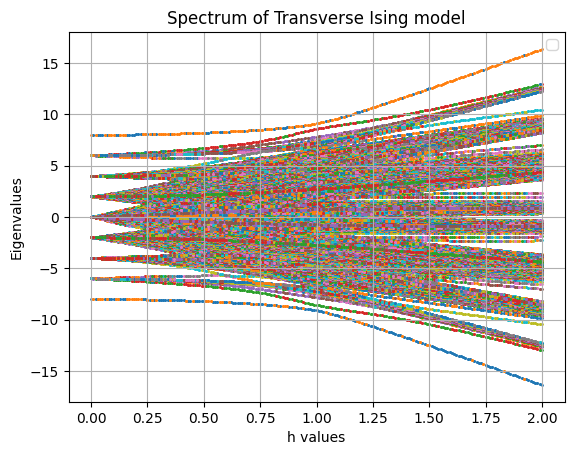

In [210]:
# Plot
for i in range(2**N):
    plt.scatter(h_values, energy_values[i], s=1)

plt.title('Spectrum of Transverse Ising model')
plt.xlabel('h values')
plt.ylabel('Eigenvalues')
plt.legend()
plt.grid(True)
plt.show()    

Try(Topological degeneracy): Check quantum phase transition happens at some value of h. For the topological degenerate phase, demonstrate the nearly degenerate ground states by calculate the energy difference $E_{1}-E_{0}$ and show it shrinks for N = 3, 5, 8. Plot the corresponding eigenstates $|\phi_{1}>$ and $|\phi_{0}>$. Check that $|\phi_{1}> = $|spins point right> + |spins point left> and $|\phi_{0}> = $|spins point right> - |spins point left>. 

Such phenomena that the phase exists nearly degenerate gound state corresponds to the so-called symmetry broken phase. However, as we solved exactly, no symmetry is broken in all eigenstates, it's just that there are two states whose energies are exponentially close to each other as the system gets large.

H is invariant under the string operator $\sum \sigma^{z}_{j}$ and is called $Z_{2}$ symmetry. Such degenerate ground states are simultaneously eigenstates of H and the string operator and are distinguished by quantum number +1 and -1 by the string operator.

Try: (Excitation)For symmetry broken phase, calculate $E_{2}- E_{0}$ and for normal phase, calculate $E_{1}- E_{0}$. Compare $|\phi_{1}>$ to $|\phi_{0}>$ and demonstrate the excitation or quasiparticle by evaluating the energy density $<H_{i}>_{\phi_{0}}$ and $<H_{i}>_{\phi_{1}}$

A more general way to extract the excitation or quasiparticle is to introduce a local trap operator $\delta H$ to the Hamiltonian $H = H_{TI}+\delta H$ where $\delta H$ is only nonzero at some local point. Solve the ground state of this new Hamiltonian $|\Phi>$ and calculate energy density $<H_{i}>_{\Phi}$.

Try: Introduce such trap $\delta H$ and reproduce the result of the previous exercise.

This general definition of quasiparticle can be applied to extract topological excitations.

Local excitation vs topological excitation: Local excitation can be created/annihilated by local operators while topological excitation cannot.

Try: For the symmetry broken phase, plot $|\phi_{2}>$ tand $|\phi_{0}>$ and see if the lowest excitation is local or topological(domain walls). Also, check $E_{2}- E_{0} = 4J$ which is the energy of two domain walls indicating that topological excitations emerge in pair.

Try: Consider anti-periodic boundary condition(multiply a minus to the coupling $\sigma^{x}_{i}\sigma^{x}_{i+1}$ of the left end and right end sites). Show that there's a single domain wall in the ground state by plotting the ground state. 

Remark: For transverse Ising model, two-fold degeneracy and non-degeneracy mark two different quantum phases, $Z_{2}$ symmetry breaking phase and normal phase. The critical regime between two phase is described by a CFT with central charge $c=\frac{1}{2}$, a minimal model of Majorana fermions.

# Topological order

Topological degeneracy (nearly degeneracy) is intrinsically different from the degeneracy from symmetry. It should correspond to macroscopic observables and some microscopic origin. 

Macroscopic: Degeneracy of the ground states $D_{g}$, where g is the genus number of spatial space the model lives in. Put a model on topolofically different space could affect the degeneracy, this can be simulated numerically. However, it's more convenient in experiments to observe various boundary-bulk effects.  

Microscopic: Long range entanglement in quantum many body states.

Remark: Topological order originates from many particle entanglement which give rise to global behavier, while topological insulator refer to energy band, which manifest topology. Sometimes one mentions the previous one quantum topology and the latter one classical topology.

Remark(Phase transition): Gap closing phase transition in topological phase transition belongs to continuous(2nd order) phase transition. The full mechanism of continuous phase transition is not known other than symmetry breaking phase transition. Gap closing phase transition hints new mechanism and the understanding about it is still ongoing.

Remark(Long range entanglement state and quantum circuit): A way to classify different phase of long range entangled states is via quantum circuits. Quantum circuits with L qubit and depth $O(L^{m})$ where m > 0 is a new direction to define topological ordered phases in terms of complexity introduced by quantum circuits.

# 4. Ansatz, representation of quantum states

The theme of quantum many body physics deviates from that of quantum information which, to some extends, in a reverse perspective. In QMB, we want to find important quantum states(usually ground state) belonging to the Hamiltonian from the gigantic Hilbert space, say finding values of $c_{i_{1},i_{2}...i_{N}}$. In QI we want to study the entangled states as useful resources to transfer information. They intersect in the task of QMB that finding a more efficient way to represent states of strong correlated matter are needed. We need to represent quantum states by ansatz other than the product states ansatz in mean-field theory.

For 1D Heisenberg model, which we've done numerics for small system, it's not trivial to label its representative quantum states. It gave rise to Bethe ansatz.  

Another convincing way is to start from ansatz and then build the corresponding local Hamiltonian whose ground state is the ansatz.

# Matrix product states

Start from wavefunction $\ket{\psi} = \sum c_{s_{1},...,s_{L}}\ket{s_{1}}\otimes\ket{s_{2}}...\otimes\ket{s_{L}}$

where $s_{i}=1,2,...,d_{i}$ and in our case $d_{i}=2$

Matrix product states ansatz writes the wavefuntion by

$\ket{\psi} = \sum tr(M^{[1],s_{1}}M^{[2],s_{2}}...M^{[L],s_{L}})\ket{s_{1}}\otimes\ket{s_{2}}...\otimes\ket{s_{L}}$

In [211]:
# MPS parameters
d = 2
D = 10
L = 40
# Initialize the L tensors with d matrices of size DxD 
M = np.zeros((L,d,D,D))